# H1C IDR3.2 Cross-Power Spectra
Compare cross-power spectra of data and model. 

In [1]:
import h5py
import numpy as np
import scipy.stats as stats
import math

from itertools import product

import astropy.units as u

from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.markers
from matplotlib.lines import Line2D

import sys
sys.path.append("/users/pkeller/code/H1C_IDR3.2/")
from closurelib import dspec
from closurelib import plot

In [13]:
trclasses = ["EQ14", "EQ28"]
fields = ["A", "B", "C", "E"]
pols = ["XX", "YY"]

data = dict()

for trclass in trclasses:
    data.update({trclass: dict()})
    
    for field in fields:
        path = f"/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/{trclass}_F{field}_B2_XPS.h5"
        data[trclass].update({field: dict()})
        
        # load data
        with h5py.File(path, "r") as f:
            data[trclass][field].update({"XPS XX AVG": f["XPS XX AVG"][()]})
            data[trclass][field].update({"XPS YY AVG": f["XPS YY AVG"][()]})
            data[trclass][field].update({"ERR XX AVG": f["ERR XX AVG"][()]})
            data[trclass][field].update({"ERR YY AVG": f["ERR YY AVG"][()]})
            data[trclass][field].update({"Noise XX AVG": f["Noise XX AVG"][()]})
            data[trclass][field].update({"Noise YY AVG": f["Noise YY AVG"][()]})
            data[trclass][field].update({"XPS AVG": f["XPS AVG"][()]})
            data[trclass][field].update({"ERR AVG": f["ERR AVG"][()]})
            data[trclass][field].update({"Noise AVG": f["Noise AVG"][()]})
            
            data[trclass][field].update({"XPS XX AVG model": f["XPS XX AVG model"][()]})
            data[trclass][field].update({"XPS YY AVG model": f["XPS YY AVG model"][()]})
            data[trclass][field].update({"ERR XX AVG model": f["ERR XX AVG model"][()]})
            data[trclass][field].update({"ERR YY AVG model": f["ERR YY AVG model"][()]})
            data[trclass][field].update({"Noise XX AVG model": f["Noise XX AVG model"][()]})
            data[trclass][field].update({"Noise YY AVG model": f["Noise YY AVG model"][()]})
            data[trclass][field].update({"XPS AVG model": f["XPS AVG model"][()]})
            data[trclass][field].update({"ERR AVG model": f["ERR AVG model"][()]})
            data[trclass][field].update({"Noise AVG model": f["Noise AVG model"][()]})
            
            delay = f["delay"][()]
            
k = dspec.get_k_parallel(delay * u.s, freq=160.11 * u.MHz).to(u.Mpc**-1).value
k_perp_14 = dspec.get_k_perpendicular(14.6 * u.m, 160.11 * u.MHz).to(u.Mpc ** -1).value
k_perp_28 = dspec.get_k_perpendicular(29.2 * u.m, 160.11 * u.MHz).to(u.Mpc ** -1).value

## Plot

### EQ14

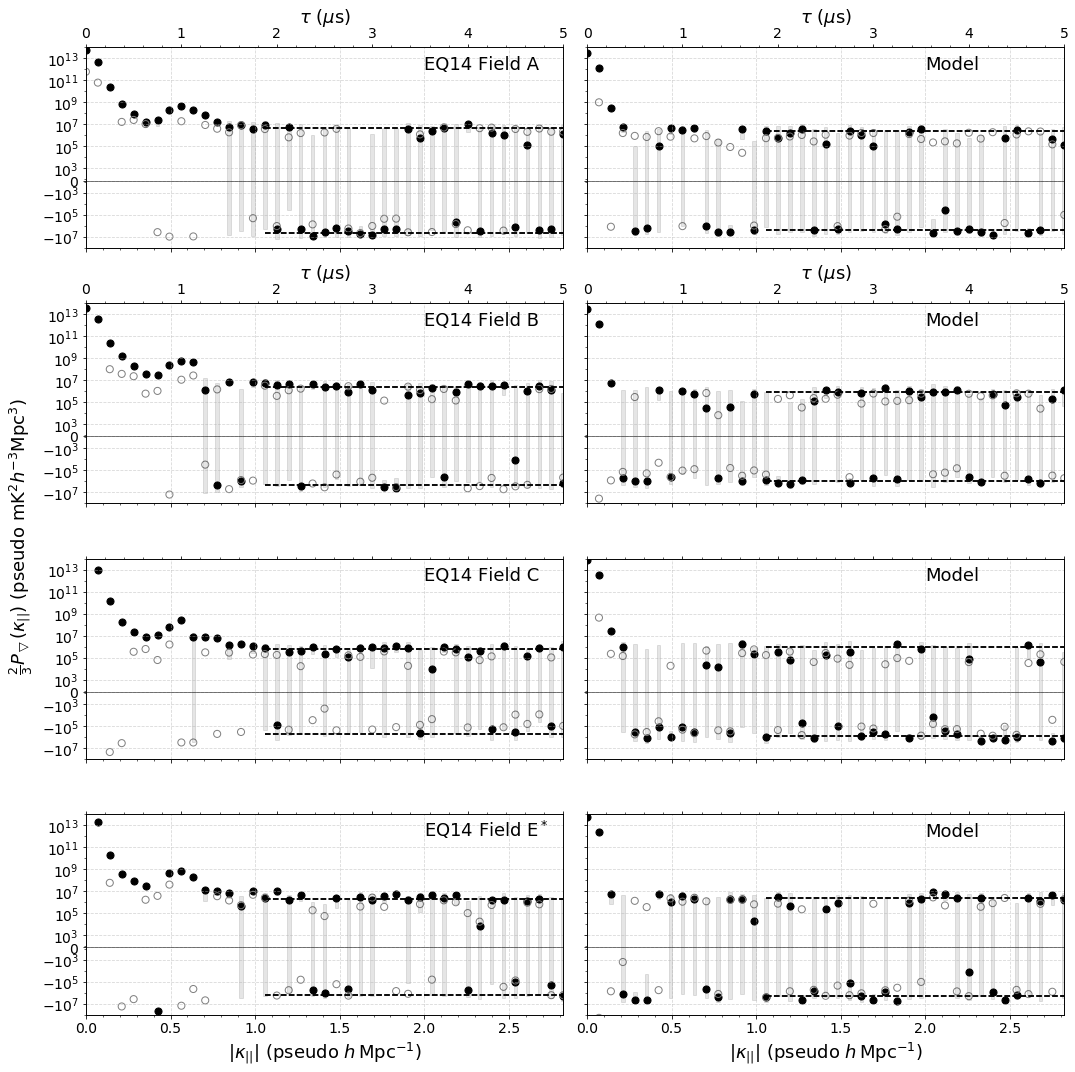

In [10]:
import imp; imp.reload(plot); imp.reload(dspec)
fig, ax = plt.subplots(4, 2, figsize=(15, 15), sharex=True, sharey=True)
yticks =  np.hstack([-1 * 10 ** np.arange(3, 12, 2), [0], 10 ** np.arange(3, 16, 2)])

for i, field in enumerate(fields):
    xps = data["EQ14"][field]["XPS AVG"]
    err = data["EQ14"][field]["ERR AVG"]
    xpsm = data["EQ14"][field]["XPS AVG model"]
    errm = data["EQ14"][field]["ERR AVG model"]
    
    ax[i, 0] = plot.xps_plot(xps, err, freq=160.11 * u.MHz, onesided=True, ax=ax[i, 0], linthresh=1e3, tau_ax=(i//2==0), nsig=2)
    ax[i, 1] = plot.xps_plot(xpsm, errm, freq=160.11 * u.MHz, onesided=True, ax=ax[i, 1], linthresh=1e3, tau_ax=(i//2==0), nsig=2)
    ax[i, 1].text(2, 1e12, r"Model", fontsize=18)
    
    if field == "E":
        ax[i, 0].text(2, 1e12, r"EQ14 Field E$^*$", fontsize=18)
    else:
        ax[i, 0].text(2, 1e12, f"EQ14 Field {field}", fontsize=18)

ax[-1, 0].set_xlabel(r"$|\kappa_{||}|$ (pseudo $h\,\mathrm{Mpc}^{-1}$)", fontsize=18)
ax[-1, 1].set_xlabel(r"$|\kappa_{||}|$ (pseudo $h\,\mathrm{Mpc}^{-1}$)", fontsize=18)

custom_markers = [Line2D([], [], color='k', marker='o', linestyle="None"),
                 Line2D([], [], mfc='None', mec='grey', marker='o', linestyle="None"),
                 Line2D([], [], mfc='k', mec='k', marker='s', alpha=0.1, linestyle="None"),
                 Line2D([0], [0], color="k", linestyle="dashed")]

#plt.legend(custom_markers, ['Real', 'Imaginary', '"2$\sigma$" Error Bars', 'Noise RMS ($\kappa_{||}>2.0$ pseudo $h\,\mathrm{Mpc}^{-1}$)'], bbox_to_anchor=(0.92, 0.02), bbox_transform=fig.transFigure, ncol=4, fontsize=16)

plt.setp(ax, ylim=[-10**8, 10**14], yticks=yticks);
plt.tight_layout()

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(left=0.08)
fig.text(0.02, 0.5, r"$\frac{2}{3}P_\bigtriangledown\left(\kappa_{||}\right)$ (pseudo $\mathrm{mK}^2h^{-3}\mathrm{Mpc}^3$)", fontsize=18, rotation=90., va="center", ha="center");


### EQ29

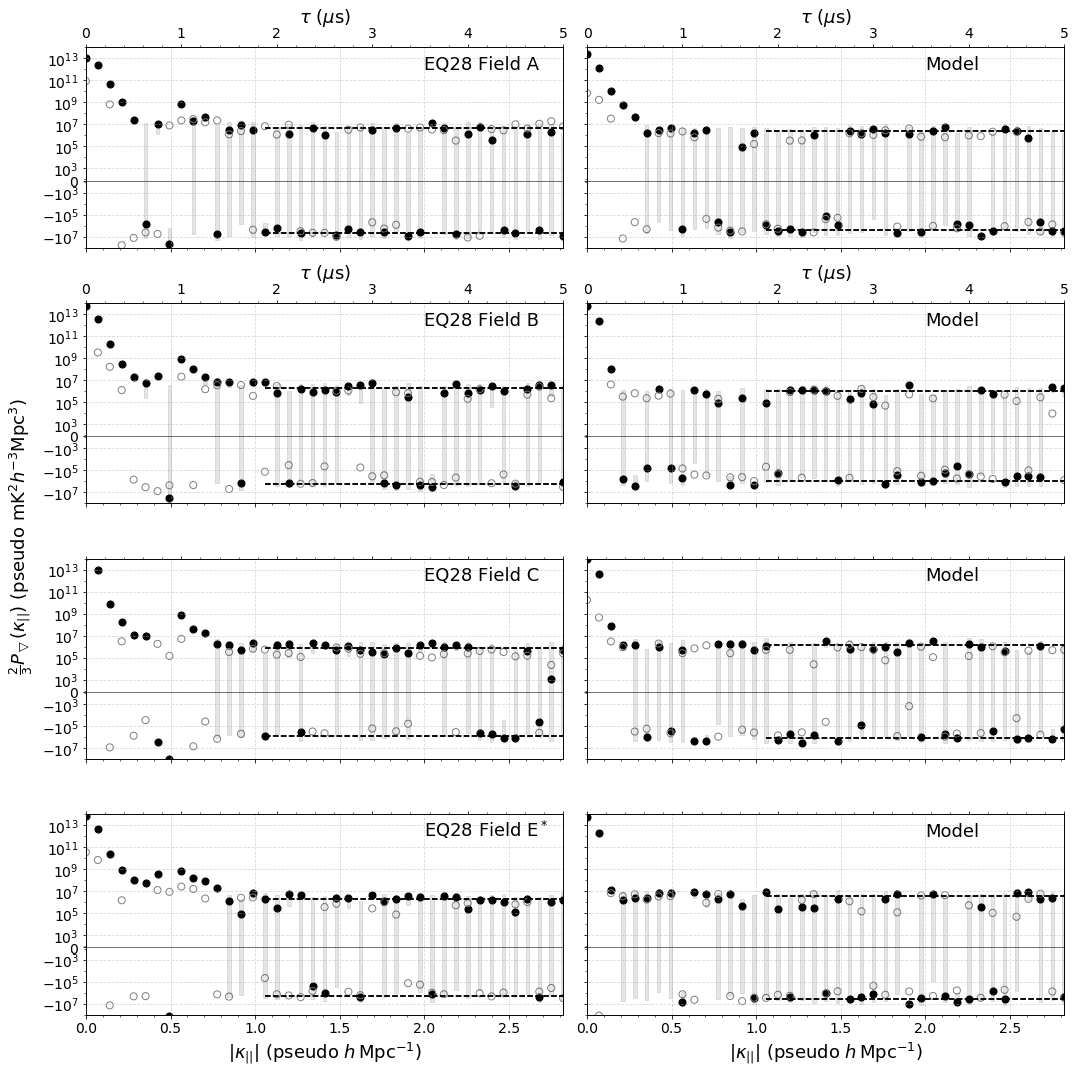

In [11]:
import imp; imp.reload(plot); imp.reload(dspec)
fig, ax = plt.subplots(4, 2, figsize=(15, 15), sharex=True, sharey=True)
yticks =  np.hstack([-1 * 10 ** np.arange(3, 12, 2), [0], 10 ** np.arange(3, 16, 2)])

for i, field in enumerate(fields):
    xps = data["EQ28"][field]["XPS AVG"]
    err = data["EQ28"][field]["ERR AVG"]
    xpsm = data["EQ28"][field]["XPS AVG model"]
    errm = data["EQ28"][field]["ERR AVG model"]
    
    ax[i, 0] = plot.xps_plot(xps, err, freq=160.11 * u.MHz, onesided=True, ax=ax[i, 0], linthresh=1e3, tau_ax=(i//2==0), nsig=2)
    ax[i, 1] = plot.xps_plot(xpsm, errm, freq=160.11 * u.MHz, onesided=True, ax=ax[i, 1], linthresh=1e3, tau_ax=(i//2==0), nsig=2)
    ax[i, 1].text(2, 1e12, r"Model", fontsize=18)
    
    if field == "E":
        ax[i, 0].text(2, 1e12, r"EQ28 Field E$^*$", fontsize=18)
    else:
        ax[i, 0].text(2, 1e12, f"EQ28 Field {field}", fontsize=18)

ax[-1, 0].set_xlabel(r"$|\kappa_{||}|$ (pseudo $h\,\mathrm{Mpc}^{-1}$)", fontsize=18)
ax[-1, 1].set_xlabel(r"$|\kappa_{||}|$ (pseudo $h\,\mathrm{Mpc}^{-1}$)", fontsize=18)

custom_markers = [Line2D([], [], color='k', marker='o', linestyle="None"),
                 Line2D([], [], mfc='None', mec='grey', marker='o', linestyle="None"),
                 Line2D([], [], mfc='k', mec='k', marker='s', alpha=0.1, linestyle="None"),
                 Line2D([0], [0], color="k", linestyle="dashed")]

#plt.legend(custom_markers, ['Real', 'Imaginary', '"2$\sigma$" Error Bars', 'Noise RMS ($\kappa_{||}>2.0$ pseudo $h\,\mathrm{Mpc}^{-1}$)'], bbox_to_anchor=(0.92, 0.02), bbox_transform=fig.transFigure, ncol=4, fontsize=16)

plt.setp(ax, ylim=[-10**8, 10**14], yticks=yticks);
plt.tight_layout()

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(left=0.08)
fig.text(0.02, 0.5, r"$\frac{2}{3}P_\bigtriangledown\left(\kappa_{||}\right)$ (pseudo $\mathrm{mK}^2h^{-3}\mathrm{Mpc}^3$)", fontsize=18, rotation=90., va="center", ha="center");


## Plot Cumulative Distribution Functions
The cumulative distribution functions of the cross-power spectra at delays > 2us is expected to be noise dominated. Comparing the cumulative distribution functions of the real and imaginary parts of the data and noise power spectra respectrively allows to asses if there are any noise biases of excess variance in the data.

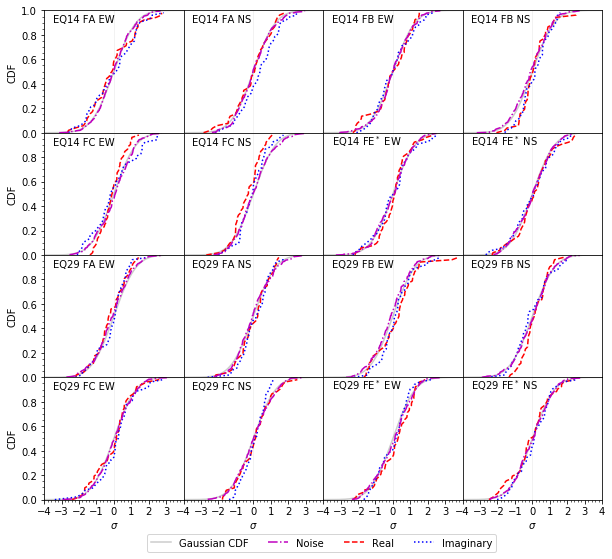

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(10, 9))

for i, (trclass, field, pol) in enumerate(product(trclasses, fields, pols)):
    idx = np.where(np.abs(k) > 1)[0]
    d = data[trclass][field][f"XPS {pol} AVG model"][..., idx]
    dr = np.sort(d.real)
    di = np.sort(d.imag)

    n = data[trclass][field][f"Noise {pol} AVG model"][idx].reshape(-1)
    n = np.hstack([n.real, n.imag])
    n = np.sort(n)
    sig = np.std(n)
    
    if trclass == "EQ28":
        trclass = "EQ29"
    if field == "E":
        field = r"E$^*$"
    if pol == "XX":
        pol = "EW"
    if pol == "YY":
        pol = "NS"

    xrange = np.linspace(-4, 4, 1000)
    cdf_gauss = [0.5*(1 + math.erf(xrange[i]/np.sqrt(2))) for i in range(1000)]

    ax[i//4, i%4].vlines(0.0, 0, 1.0, linewidth=0.5, alpha=0.1)
    ax[i//4, i%4].plot(xrange, cdf_gauss, color="k", alpha=0.2)
    ax[i//4, i%4].plot(dr / sig, np.arange(len(dr)) / (len(dr)), color="r", linestyle="--")
    ax[i//4, i%4].plot(di / sig, np.arange(len(di)) / (len(di)), color="b", linestyle=":")
    ax[i//4, i%4].plot(n / sig, np.arange(len(n)) / (len(n)), color="m", linestyle="-.")
    ax[i//4, i%4].text(-3.5, 0.9, f"{trclass} F{field} {pol}")
    ax[i//4, i%4].minorticks_on()

fig.subplots_adjust(wspace=0.0, hspace=0.0)

custom_lines = [Line2D([0], [0], color="k", alpha=0.2),
                Line2D([0], [0], color="m", linestyle="-."),
                Line2D([0], [0], color="r", linestyle="--"),
                Line2D([0], [0], color="b", linestyle=":")]

plt.legend(custom_lines, ['Gaussian CDF', 'Noise', 'Real', 'Imaginary'], bbox_to_anchor=(0.76, 0.08), bbox_transform=fig.transFigure, ncol=4)
plt.setp(ax, xlim=[-4, 4], ylim=[0, 1], xticks=[], yticks=[]);
plt.setp(ax[:, 0], yticks=np.arange(0.0, 1.0, 0.2));
plt.setp(ax[0, 0], yticks=np.arange(0.0, 1.2, 0.2));
plt.setp(ax[-1], xticks=np.arange(-4, 4));
plt.setp(ax[-1, -1], xticks=np.arange(-4, 5));
plt.setp(ax[:, 0], ylabel="CDF");
plt.setp(ax[-1], xlabel=r"$\sigma$");

## Statistical Tests
We use two statistical tests to our data: (1) Shapiro-Wilk test for normality and (2) Kolmogorov-Smirnov test. The first test draws on the observation that the noise is well matched to a Gaussian distribution. The second test is to see if how well the distribution of the power spectra at high delays matches the noise distribution. The K-S test is nonparametric and therefore makes no assumptions about the distributions of the data and the noise. To be exact, we are testing the Null-Hypothesis that the two distributions under comparison are equal. We reject the Null-Hypothesis based on a chosen significance threshold of 0.05. A p-value p<0.05 means we reject the null-hypothesis whereas p>0.05 means we can't reject the null-hypothesis. A p-value of 0.05 roughly corresponds to a 5 sigma rejection level in the case of a Gaussian distriubution.

In [17]:
for i, (trclass, field, pol) in enumerate(product(trclasses, fields, pols)):
    idx = np.where(np.abs(k) > 1)[0]
    d = data[trclass][field][f"XPS {pol} AVG"][..., idx]
    n = data[trclass][field][f"Noise {pol} AVG"][idx].reshape(-1)
    n = np.hstack([n.real, n.imag])
    shapiro = stats.shapiro(n / n.std())
    ad_real = stats.anderson_ksamp([d.real, n])
    ad_imag = stats.anderson_ksamp([d.imag, n])
        
    if shapiro[1]<0.05:
        color1 = "\cellcolor{myred}"
    else:
        color1 = "\cellcolor{mygreen}"
    
    if ad_real[0]>ad_real[1][2]:
        color2 = "\cellcolor{myred}"
    else:
        color2 = "\cellcolor{mygreen}"
        
    if ad_imag[0]>ad_imag[1][2]:
        color3 = "\cellcolor{myred}"
    else:
        color3 = "\cellcolor{mygreen}"
        
    # print LaTex table
    print("{} Field {} {} & {} {:.3f} & {} {:.3f} & {} {} & {} {:.3f} & {} {} & {} {:.3f} & {} {} \\\\".format(trclass, field, pol, color1, shapiro[0], color1, shapiro[1], color1, shapiro[1]<0.05, color2, ad_real[0], color2, ad_real[0]>ad_real[1][2], color3, ad_imag[0], color3, ad_imag[0]>ad_imag[1][2]))

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: p-value capped: true value larger than 0.25
  import sys
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: p-value capped: true value larger than 0.25
  


EQ14 Field A XX & \cellcolor{mygreen} 0.997 & \cellcolor{mygreen} 0.745 & \cellcolor{mygreen} False & \cellcolor{mygreen} -0.821 & \cellcolor{mygreen} False & \cellcolor{mygreen} 1.323 & \cellcolor{mygreen} False \\
EQ14 Field A YY & \cellcolor{mygreen} 0.995 & \cellcolor{mygreen} 0.451 & \cellcolor{mygreen} False & \cellcolor{mygreen} -0.939 & \cellcolor{mygreen} False & \cellcolor{mygreen} -0.823 & \cellcolor{mygreen} False \\
EQ14 Field B XX & \cellcolor{mygreen} 0.994 & \cellcolor{mygreen} 0.313 & \cellcolor{mygreen} False & \cellcolor{mygreen} 1.616 & \cellcolor{mygreen} False & \cellcolor{mygreen} -0.184 & \cellcolor{mygreen} False \\
EQ14 Field B YY & \cellcolor{mygreen} 0.996 & \cellcolor{mygreen} 0.584 & \cellcolor{mygreen} False & \cellcolor{myred} 8.659 & \cellcolor{myred} True & \cellcolor{mygreen} -0.023 & \cellcolor{mygreen} False \\
EQ14 Field C XX & \cellcolor{mygreen} 0.994 & \cellcolor{mygreen} 0.285 & \cellcolor{mygreen} False & \cellcolor{myred} 2.054 & \cellcolor{m

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: p-value floored: true value smaller than 0.001
  import sys
